In [27]:
# Importing SparkSession class from the pyspark.sql module 
from pyspark.sql import SparkSession

# Creating a SparkSession
spark = SparkSession.builder.appName('House Price Prediction').getOrCreate()

# Loading the data into a Spark DataFrame with its location
df = spark.read.csv("file:/Users/ummefahmidaakter/Downloads/House_price.csv", inferSchema = True, header = True, multiLine = True)

# Displaying the rows of the DataFrame
df.show()

# Printing the schema of the DataFrame
df.printSchema()


+----------------+-----------+---------------+------------------+---------------+-----------+--------------------+
|Avg. Area Income|  House Age|Number of Rooms|Number of Bedrooms|Area Population|      Price|             Address|
+----------------+-----------+---------------+------------------+---------------+-----------+--------------------+
|     79545.45857|5.682861322|    7.009188143|              4.09|     23086.8005|1059033.558|208 Michael Ferry...|
|     79248.64245|6.002899808|    6.730821019|              3.09|    40173.07217|1505890.915|188 Johnson Views...|
|     61287.06718| 5.86588984|     8.51272743|              5.13|     36882.1594|1058987.988|9127 Elizabeth St...|
|     63345.24005|7.188236095|    5.586728665|              3.26|    34310.24283|1260616.807|USS Barnett\nFPO ...|
|     59982.19723|5.040554523|    7.839387785|              4.23|    26354.10947|630943.4893|USNS Raymond\nFPO...|
|     80175.75416|4.988407758|    6.104512439|              4.04|    26748.42842

<AxesSubplot:>

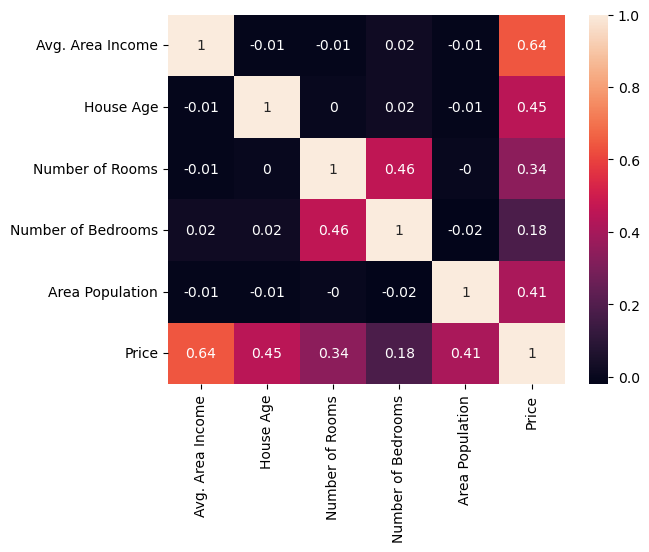

In [28]:
# Importing Pandas library for data manipulation and analysis
import pandas as pd

# Importing NumPy library for scientific computing
import numpy as np

# Importing Seaborn library for data visualization
import seaborn as sns

# Importing Matplotlib as a plotting library
import matplotlib.pyplot as plt

# Reading the CSV file 
panda_df = pd.read_csv('House_price.csv')

# Calculating the Pearson Correlation Coefficients 
matrix = panda_df.loc[:, 'Avg. Area Income':'Price'].corr(method='pearson').round(2)

# Creating a heat map of the Correlation Matrix
sns.heatmap(matrix, annot = True)


In [29]:
# Replacing '.' with '_' in column names
new_cols=(column.replace('.', '_') for column in df.columns)

# Passing new column names
df2 = df.toDF(*new_cols)

# Displaying rows of the new DataFrame
df2.show()

# Printinging column names of the new DataFrame
df2.columns

+----------------+-----------+---------------+------------------+---------------+-----------+--------------------+
|Avg_ Area Income|  House Age|Number of Rooms|Number of Bedrooms|Area Population|      Price|             Address|
+----------------+-----------+---------------+------------------+---------------+-----------+--------------------+
|     79545.45857|5.682861322|    7.009188143|              4.09|     23086.8005|1059033.558|208 Michael Ferry...|
|     79248.64245|6.002899808|    6.730821019|              3.09|    40173.07217|1505890.915|188 Johnson Views...|
|     61287.06718| 5.86588984|     8.51272743|              5.13|     36882.1594|1058987.988|9127 Elizabeth St...|
|     63345.24005|7.188236095|    5.586728665|              3.26|    34310.24283|1260616.807|USS Barnett\nFPO ...|
|     59982.19723|5.040554523|    7.839387785|              4.23|    26354.10947|630943.4893|USNS Raymond\nFPO...|
|     80175.75416|4.988407758|    6.104512439|              4.04|    26748.42842

['Avg_ Area Income',
 'House Age',
 'Number of Rooms',
 'Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

In [30]:
# Importing Vectors class from the pyspark.ml.linalg module
from pyspark.ml.linalg import Vectors

# Importing VectorAssembler class from the pyspark.ml.feature module
from pyspark.ml.feature import VectorAssembler

# Defining the list of feature column names
coeff_var = ['Avg_ Area Income','House Age','Number of Rooms','Number of Bedrooms','Area Population']

# Creating a VectorAssembler object to combine the feature columns into a single feature vector
assembler = VectorAssembler(inputCols=coeff_var, outputCol='features')

# Using the VectorAssembler object to transform the DataFrame and create the feature vector
output = assembler.transform(df2)

# Selecting only the feature vector and label columns
final_df = output.select('features', 'Price')

# Showing the resulting DataFrame
final_df.show()


+--------------------+-----------+
|            features|      Price|
+--------------------+-----------+
|[79545.45857,5.68...|1059033.558|
|[79248.64245,6.00...|1505890.915|
|[61287.06718,5.86...|1058987.988|
|[63345.24005,7.18...|1260616.807|
|[59982.19723,5.04...|630943.4893|
|[80175.75416,4.98...|1068138.074|
|[64698.46343,6.02...|1502055.817|
|[78394.33928,6.98...|1573936.564|
|[59927.66081,5.36...|798869.5328|
|[81885.92718,4.42...|1545154.813|
|[80527.47208,8.09...|1707045.722|
|[50593.6955,4.496...|663732.3969|
|[39033.80924,7.67...|1042814.098|
|[73163.66344,6.91...|1291331.518|
|[69391.38018,5.34...| 1402818.21|
|[73091.86675,5.44...| 1306674.66|
|[79706.96306,5.06...|  1556786.6|
|[61929.07702,4.78...|528485.2467|
|[63508.1943,5.947...|1019425.937|
|[62085.2764,5.739...|1030591.429|
+--------------------+-----------+
only showing top 20 rows



In [31]:
# Splitting the dataset into 70% train and 30% test set
train_data, test_data = final_df.randomSplit([0.7, 0.3], seed=123)

# Generating a summary statistics
train_data.describe().show()
test_data.describe().show()

# Printing the number of rows in each set
print(f"Number of rows in train set: {train_data.count()}")
print(f"Number of rows in test set: {test_data.count()}")

+-------+-----------------+
|summary|            Price|
+-------+-----------------+
|  count|             3158|
|   mean| 1233352.28644781|
| stddev|356676.9891685789|
|    min|      31140.51762|
|    max|      2469065.594|
+-------+-----------------+

+-------+------------------+
|summary|             Price|
+-------+------------------+
|  count|              1390|
|   mean|1235196.0540665619|
| stddev|349851.91175218805|
|    min|       15938.65792|
|    max|       2330289.701|
+-------+------------------+

Number of rows in train set: 3158
Number of rows in test set: 1390


In [32]:
# Importing LinearRegression module from the pySpark.ml library
from pyspark.ml.regression import LinearRegression

# Defining the linear regression model
lm = LinearRegression(featuresCol='features', labelCol = 'Price', maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Train the model on the training data
model = lm.fit(train_data)

# Print the coefficients and intercept of the linear regression model
import pandas as pd
pd.DataFrame({'Coeffiecients':model.coefficients}, index = coeff_var)

,Coeffiecients
Avg_ Area Income,21.598038
House Age,165837.849970
Number of Rooms,120289.604320
Number of Bedrooms,765.717585
Area Population,15.257495


In [33]:
print(f"Intercept: {model.intercept}")

Intercept: -2635385.1203063065


In [34]:
# Importing LinearRegression module from the pyspark.ml library
from pyspark.ml.regression import LinearRegression

# Importing RegressionEvaluator to find out MAE, MSE and RMSE
from pyspark.ml.evaluation import RegressionEvaluator

# Importing the col function from the pyspark.sql.functions module
from pyspark.sql.functions import col



# Using the trained model to make predictions on the train_data 
train_predictions = model.transform(train_data)

# Evaluating MAE for the actual values and predicted values of 'Price'
train_evaluator = RegressionEvaluator(labelCol='Price', predictionCol='prediction', metricName='mae')

# Calling evaluate method to compute the MAE on the train_predictions 
train_mae = train_evaluator.evaluate(train_predictions)

# Evaluating RMSE for the actual values and predicted values of 'Price'
train_evaluator = RegressionEvaluator(labelCol='Price', predictionCol='prediction', metricName='rmse')

# Calling evaluate method to compute the RMSE on the train_predictions 
train_rmse = train_evaluator.evaluate(train_predictions)

# Evaluating MSE for the actual values and predicted values of 'Price'
train_evaluator = RegressionEvaluator(labelCol='Price', predictionCol='prediction', metricName='mse')

# Calling evaluate method to compute the MSE on the train_predictions 
train_mse = train_evaluator.evaluate(train_predictions)



# Using the trained model to make predictions on the test_data 
test_predictions = model.transform(test_data)

# Evaluating MAE for the actual values and predicted values of 'Price'
test_evaluator = RegressionEvaluator(labelCol='Price', predictionCol='prediction', metricName='mae')

# Calling evaluate method to compute the MAE on the test_predictions 
test_mae = test_evaluator.evaluate(test_predictions)

# Evaluating RMSE for the actual values and predicted values of 'Price'
test_evaluator = RegressionEvaluator(labelCol='Price', predictionCol='prediction', metricName='rmse')

# Calling evaluate method to compute the RMSE on the test_predictions 
test_rmse = test_evaluator.evaluate(test_predictions)

# Evaluating MSE for the actual values and predicted values of 'Price'
test_evaluator = RegressionEvaluator(labelCol='Price', predictionCol='prediction', metricName='mse')

# Calling evaluate method to compute the MSE on the test_predictions 
test_mse = test_evaluator.evaluate(test_predictions)

# Printing the evaluation results
print("Train MAE: {:.3f}".format(train_mae))
print("Train RMSE: {:.3f}".format(train_rmse))
print("Train MSE: {:.3f}".format(train_mse))
print("Test MAE: {:.3f}".format(test_mae))
print("Test RMSE: {:.3f}".format(test_rmse))
print("Test MSE: {:.3f}".format(test_mse))

Train MAE: 81534.010
Train RMSE: 101761.494
Train MSE: 10355401629.372
Test MAE: 80837.317
Test RMSE: 99420.849
Test MSE: 9884505168.838


+------------------+-----------+
|        prediction|      Price|
+------------------+-----------+
| 548223.0683692778|449331.5835|
|  757243.414874786|899609.3001|
|489530.28743794886|401148.5688|
| 575690.9449098874|781137.4618|
|493878.75722003495|539483.3966|
| 628208.9066483118|737147.0943|
| 461528.9370427043|494742.5436|
| 894268.1773490831|852703.2637|
| 932088.1468880251|904785.1632|
| 526207.5140465419|452530.1767|
|1125149.9576331507| 1078016.94|
|442124.52756661456|513215.9882|
| 740137.6331482003|777733.6134|
| 623222.5154219428|629657.6133|
| 896084.1945998194|809486.7099|
| 824391.4353199094|747933.4869|
| 471469.1758905398|503065.5056|
| 777894.0593024618|691318.2401|
|404448.05868809763|291724.2456|
| 1170504.205252768|1048800.651|
+------------------+-----------+
only showing top 20 rows



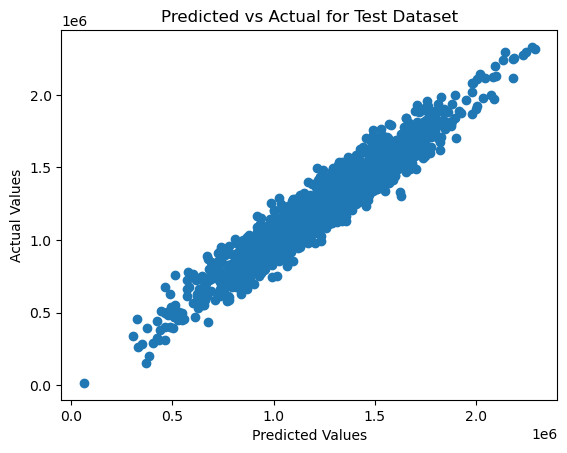

In [35]:
# Selecting the predicted values and the actual values 
predictions = test_predictions.select("prediction", "Price")
predictions.show()

# Importing required libraries
import matplotlib.pyplot as plt
import numpy as np

# Extracting the Predicted and Actual ‘Price’ values, and storing them as NumPy arrays
x = np.array(test_predictions.select("prediction").collect())
y = np.array(test_predictions.select("Price").collect())

# Creating a scatter plot of the Predicted Values (x-axis) versus the Actual Values (y-axis)
plt.scatter(x, y)

# Setting the x-axis label
plt.xlabel("Predicted Values")

# Setting the y-axis label, and plot title
plt.ylabel("Actual Values")

# Setting the plot title
plt.title("Predicted vs Actual for Test Dataset")

# Displaying the plot
plt.show()

/Users/ummefahmidaakter/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ummefahmidaakter/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


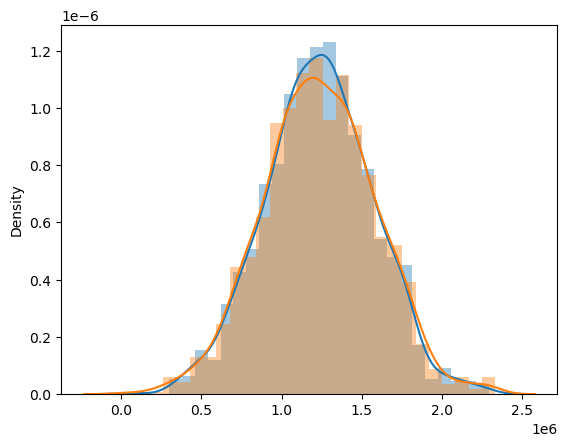

In [36]:
# Importing seaborn, the data visualization library for python
import seaborn as sns

# Creating a distribution plot of the predicted values 
sns.distplot(x)

# Creating a distribution plot of the actual values
sns.distplot(y);